In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as iplot
from datetime import date

In [2]:
end = date.today()

In [3]:
end

datetime.date(2022, 7, 20)

In [4]:
start = datetime.datetime(2017, 1, 1)
end = date.today()

In [5]:
ZIM = data.DataReader("ZIM", 'yahoo', start, end)


OBE = data.DataReader("OBE.TO", 'yahoo', start, end)


SHOP = data.DataReader("SHOP.TO", 'yahoo', start, end)


PKK = data.DataReader("PKK.CN", 'yahoo', start, end)


BABA = data.DataReader("BABA", 'yahoo', start, end)


GOOG = data.DataReader("GOOG", 'yahoo', start, end)

In [6]:
df = data.DataReader(['ZIM', 'OBE', 'SHOP', 'PKK', 'BABA', 'GOOG'],'yahoo', start, end)

In [7]:
tickers = ['BABA', 'GOOG', 'OBE', 'PKK', 'SHOP', 'ZIM']

In [8]:
stocks = pd.concat([BABA, GOOG, OBE, PKK, SHOP, ZIM],axis=1,keys=tickers)

In [9]:
stocks.columns.names = ['Ticker','Stock Info']

In [10]:
stocks.head()

Ticker           BABA                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2017-01-03  89.000000  88.080002  89.000000  88.599998   8789400.0  88.599998   
2017-01-04  90.889999  88.580002  88.985001  90.510002  11490200.0  90.510002   
2017-01-05  94.809998  91.639999  91.910004  94.370003  16821500.0  94.370003   
2017-01-06  94.500000  93.000000  94.400002  93.889999   7639800.0  93.889999   
2017-01-09  95.650002  93.309998  94.160004  94.720001  10829500.0  94.720001   

Ticker           GOOG                                   ...   SHOP         \
Stock Info       High        Low       Open      Close  ...   Open  Close   
Date                                                    ...                 
2017-01-03  39.481499  38.790001  38.940498  39.306999  ...  5.822  5.765   
2017-01-04  39.567001  39.158001  39.417999  39.345001  ...  5.796  5.886   
2017-01-05  39.723999  39.250999  39.304001  39.701000  ...  5.880  6.316   
2017-01-06  40.395000  39.610199  39.763000  40.307499  ...  6.298  6.203   
2017-01-09  40.498299  40.141499  40.320000  40.332500  ...  6.212  6.254   

Ticker                           ZIM                                  
Stock Info     Volume Adj Close High Low Open Close Volume Adj Close  
Date                                                                  
2017-01-03   836000.0     5.765  NaN NaN  NaN   NaN    NaN       NaN  
2017-01-04   847000.0     5.886  NaN NaN  NaN   NaN    NaN       NaN  
2017-01-05  2683000.0     6.316  NaN NaN  NaN   NaN    NaN       NaN  
2017-01-06  1985000.0     6.203  NaN NaN  NaN   NaN    NaN       NaN  
2017-01-09   792000.0     6.254  NaN NaN  NaN   NaN    NaN       NaN  

[5 rows x 36 columns]

In [11]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Ticker
BABA    317.140015
GOOG    150.709000
OBE      18.830000
PKK      14.020000
SHOP    213.981995
ZIM      88.620003
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers: 
    returns[tick+' Return'] = stocks[tick]['Close'].pct_change()
returns.head()

,BABA Return,GOOG Return,OBE Return,PKK Return,SHOP Return,ZIM Return
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.021558,0.000967,0.008264,0.200000,0.020989,NaN
2017-01-05,0.042647,0.009048,0.036885,0.000000,0.073055,NaN
2017-01-06,-0.005086,0.015277,0.063241,-0.083333,-0.017891,NaN
2017-01-09,0.008840,0.000620,-0.040892,0.000000,0.008222,NaN


In [14]:
# Date of worst returns 
returns.idxmin()

BABA Return   2020-12-24
GOOG Return   2020-03-16
OBE Return    2020-03-09
PKK Return    2022-05-03
SHOP Return   2022-02-16
ZIM Return    2022-06-08
dtype: datetime64[ns]

In [15]:
# Date of highest returns 
returns.idxmax()

BABA Return   2022-03-16
GOOG Return   2019-07-26
OBE Return    2020-05-19
PKK Return    2019-08-30
SHOP Return   2020-03-24
ZIM Return    2021-03-11
dtype: datetime64[ns]

In [16]:
returns

,BABA Return,GOOG Return,OBE Return,PKK Return,SHOP Return,ZIM Return
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.021558,0.000967,0.008264,0.200000,0.020989,NaN
2017-01-05,0.042647,0.009048,0.036885,0.000000,0.073055,NaN
2017-01-06,-0.005086,0.015277,0.063241,-0.083333,-0.017891,NaN
2017-01-09,0.008840,0.000620,-0.040892,0.000000,0.008222,NaN
...,...,...,...,...,...,...
2022-07-14,-0.048946,-0.006658,0.004587,-0.014286,-0.036922,-0.043506
2022-07-15,-0.012722,0.011908,0.018265,0.000000,0.013194,0.040556
2022-07-18,0.006833,-0.025335,0.088565,-0.014493,0.037838,0.028424


In [17]:
# Which stock is riskiest over the period? Check the standard deviation 
returns.std()
#PKK is by far the riskiest. Google safest. Makes sense 

BABA Return    0.027226
GOOG Return    0.017648
OBE Return     0.049174
PKK Return     0.080851
SHOP Return    0.035889
ZIM Return     0.043080
dtype: float64

C:\Users\RexDe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHOP Return', ylabel='Density'>

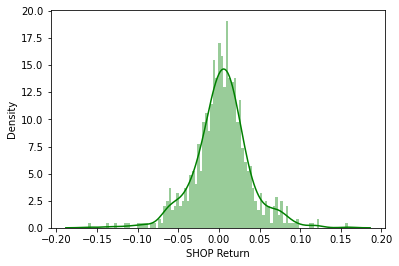

In [18]:
sns.distplot(returns.loc['2018-01-01':'2020-12-31']['SHOP Return'],color='green',bins=100)

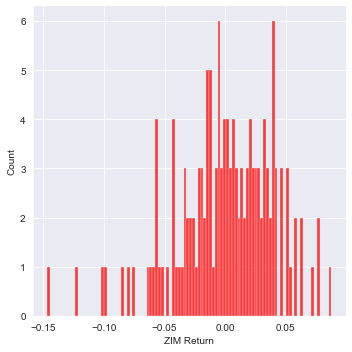

In [19]:
sns.set_style("darkgrid")
sns.displot(returns.loc['2022-01-01':'2022-12-31']['ZIM Return'],color="red",bins=100)

In [20]:

sns.set_style('whitegrid')
%matplotlib inline


import plotly
import cufflinks as cf
cf.go_offline()

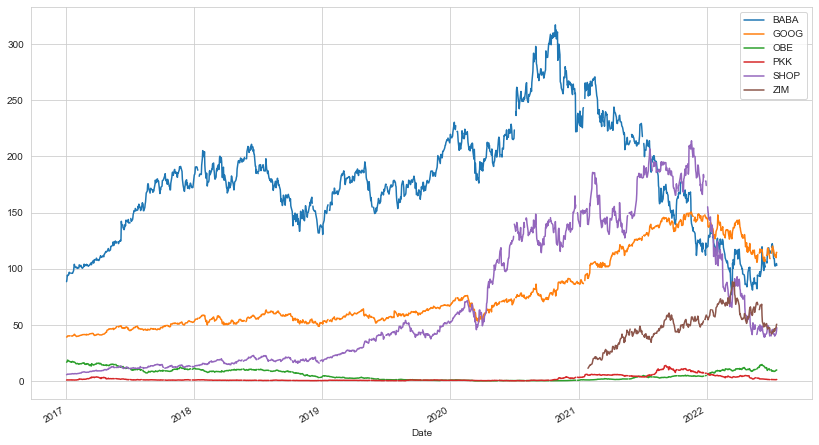

In [21]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(14,8),label=tick)
plt.legend()

In [22]:
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

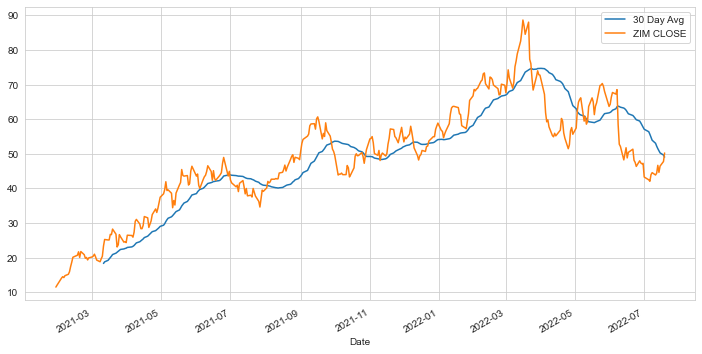

In [23]:
plt.figure(figsize=(12,6))
ZIM['Close'].loc['2019-01-01':'2022-07-19'].rolling(window=30).mean().plot(label='30 Day Avg')
ZIM['Close'].loc['2008-01-01':'2022-07-19'].plot(label='ZIM CLOSE')
plt.legend()


<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

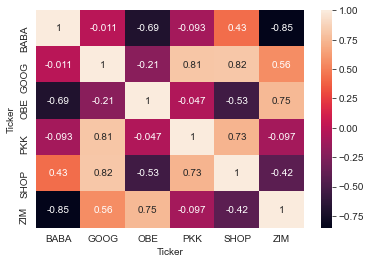

In [24]:
# Check correlation between stocks close price
sns.heatmap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

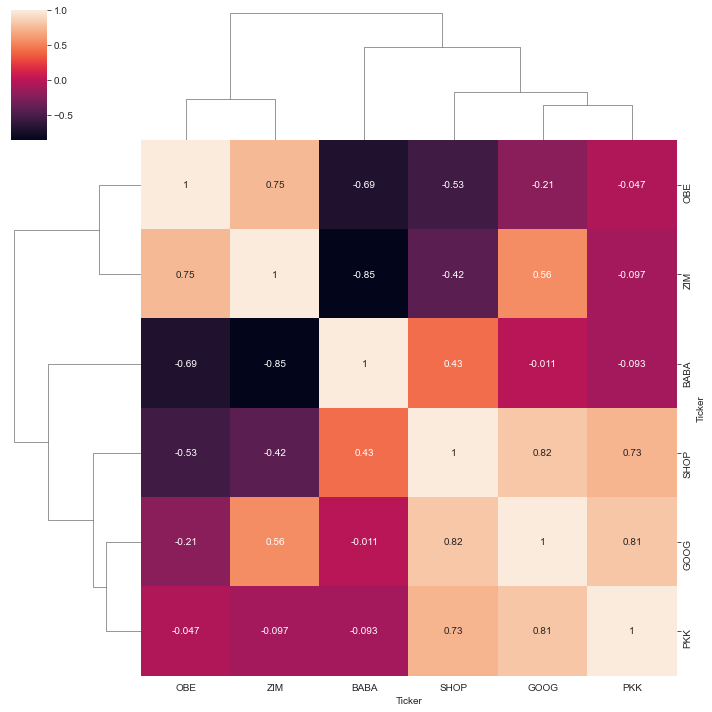

In [25]:
sns.clustermap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [26]:
ZIM[['Open', 'High', 'Low', 'Close']].loc['2021-01-01':'2022-07-19'].iplot(kind='candle')